[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 17** | Árvores II | Exercício 28

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 11 de junho de 2025.

---

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [23]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Carregar as bases salvas na Tarefa 1
X_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\X_train_processed.csv", index_col=[0, 1])
X_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\X_test_processed.csv", index_col=[0, 1])
y_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\train\y_train.txt", header=None).squeeze("columns")
y_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\UCI HAR Dataset\test\y_test.txt", header=None).squeeze("columns")
features = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\features_processed.csv")["feature"]
subjects_train = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\subjects_test_processed.csv", index_col=0)
subjects_test = pd.read_csv(r"C:\Users\earap\Documents\EBAC\DataScienceExcercises\Módulo 17 - Árvores II\ex026\subjects_test_processed.csv", index_col=0)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
# Passo 2: Ajustar a árvore de decisão com min_samples_leaf=20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [7]:
# Passo 3: Calcular os ccp_alphas
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])

In [8]:
# Passo 4: Selecionar um subconjunto de ccp_alphas (1 a cada 5 valores)
ccp_alphas_subset = ccp_alphas[::5]

print("Valores selecionados de ccp_alpha:", ccp_alphas_subset)

Valores selecionados de ccp_alpha: [7.12472149e-06 2.65359119e-05 5.02888902e-05 1.89159199e-04
 3.41177004e-04 7.79039476e-04 1.22995084e-03 1.63595958e-03
 2.03801886e-03 2.41999829e-03 5.50087182e-03 1.17869342e-02
 1.67257720e-01]


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [9]:
# Selecionar ccp_alphas (1 a cada 10 valores)
ccp_alphas_subset = ccp_alphas[::10]

In [12]:
# Iniciar a medição de tempo
start_time = time.time()

In [13]:
# Definir o modelo de árvore de decisão
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [14]:
# Definir o parâmetro de pesquisa (ccp_alpha)
param_grid = {'ccp_alpha': ccp_alphas_subset}

In [15]:
# Aplicar GridSearchCV com validação cruzada k=10
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [16]:
# Ajustar o modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([7.12472149e-06, 5.02888902e-05, 3.41177004e-04, 1.22995084e-03,
       2.03801886e-03, 5.50087182e-03, 1.67257720e-01])},
             scoring='accuracy')

In [17]:
# Medir o tempo de execução
end_time = time.time()
execution_time = end_time - start_time

In [18]:
# Exibir os resultados
print("Melhor parâmetro ccp_alpha:", grid_search.best_params_)
print("Melhor pontuação de validação cruzada:", grid_search.best_score_)
print(f"Tempo de execução: {execution_time:.2f} segundos")

Melhor parâmetro ccp_alpha: {'ccp_alpha': 0.002038018857478067}
Melhor pontuação de validação cruzada: 0.8752787636793847
Tempo de execução: 153.60 segundos


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [19]:
# Obter o melhor ccp_alpha do grid search
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

In [20]:
# Treinar a árvore de decisão com o melhor ccp_alpha
best_tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, min_samples_leaf=20, random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002038018857478067, min_samples_leaf=20,
                       random_state=42)

In [24]:
# Calcular a acurácia na base de testes
y_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de teste: {test_accuracy:.4f}")

Acurácia na base de teste: 0.8663


In [25]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

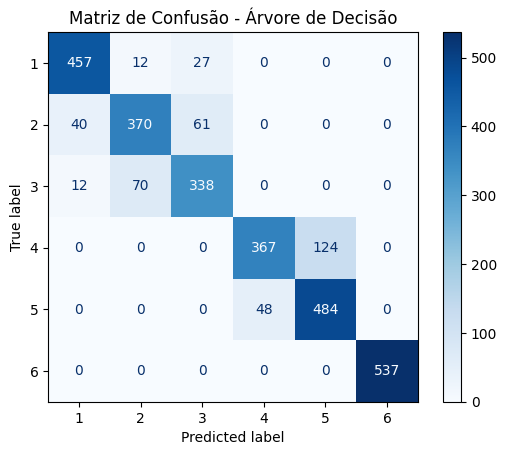

In [26]:
# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [27]:
# Passo 1: Identificar a classe com maior erro (exemplo: classe 1)
cm = confusion_matrix(y_test, y_pred)
class_errors = cm.sum(axis=1) - np.diagonal(cm)  
most_difficult_class = np.argmax(class_errors)  
print(f"Classe com maior erro: {most_difficult_class + 1}")

Classe com maior erro: 4


In [28]:
# Passo 2: Criar variável binária para a classe mais difícil de identificar
y_train_bin = (y_train == most_difficult_class + 1).astype(int)
y_test_bin = (y_test == most_difficult_class + 1).astype(int)

In [29]:
# Passo 3: Criar árvore de decisão simples para a variável binária
tree_bin = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)
tree_bin.fit(X_train, y_train_bin)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [30]:
# Passo 4: Observar a importância das variáveis
importances = tree_bin.feature_importances_
indices = np.argsort(importances)[::-1] 

In [31]:
# Selecione as 3 variáveis mais importantes
top_3_variables = indices[:3]
print(f"Top 3 variáveis mais importantes: {top_3_variables}")

Top 3 variáveis mais importantes: [ 52 559 426]


In [32]:
# Passo 5: Rodar novamente o algoritmo com as 3 variáveis mais importantes
X_train_top3 = X_train.iloc[:, top_3_variables]
X_test_top3 = X_test.iloc[:, top_3_variables]

In [33]:
# Treinar a árvore com as 3 variáveis mais importantes
tree_top3 = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)
tree_top3.fit(X_train_top3, y_train_bin)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [34]:
# Calcular a acurácia na base de testes
y_pred_top3 = tree_top3.predict(X_test_top3)
test_accuracy_top3 = accuracy_score(y_test_bin, y_pred_top3)
print(f"Acurácia com as 3 variáveis mais importantes: {test_accuracy_top3:.4f}")

Acurácia com as 3 variáveis mais importantes: 0.9467
